# fetch_olivetti_facesを使って顔識別を行う

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
faces = fetch_olivetti_faces()

In [5]:
x = faces.images
y = faces.target

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [7]:
X_train = X_train.reshape(320,4096) / 255
X_test = X_test.reshape(80,4096) / 255

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
model = Sequential([
        Dense(512, input_shape=(4096,)),
        Activation('sigmoid'),
        Dense(40),
        Activation('softmax')
    ])

In [13]:
# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## モデルを使って学習する

In [18]:
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 1s 2ms/step - loss: 3.7269 - accuracy: 0.0208 - val_loss: 3.8215 - val_accuracy: 0.0000e+00
Epoch 2/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7255 - accuracy: 0.0174 - val_loss: 3.8055 - val_accuracy: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 0s 970us/step - loss: 3.7309 - accuracy: 0.0139 - val_loss: 3.8043 - val_accuracy: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 0s 950us/step - loss: 3.7273 - accuracy: 0.0174 - val_loss: 3.7843 - val_accuracy: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7281 - accuracy: 0.0208 - val_loss: 3.7886 - val_accuracy: 0.0000e+00
Epoch 6/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7282 - accuracy: 0.0208 - val_loss: 3.7932 - val_accuracy: 0.0000e+00
Epoch 7/20
288/288 [==============================] - 0s 1ms/step - loss: 3

## 結果の確認

In [15]:
# 予測
score = model.evaluate(X_test, y_test, verbose=1)
print('test accuracy : ', score[1])

80/80 [==============================] - 0s 329us/step
test accuracy :  0.0


## グラフ作成

In [17]:
import matplotlib.pyplot as plt

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

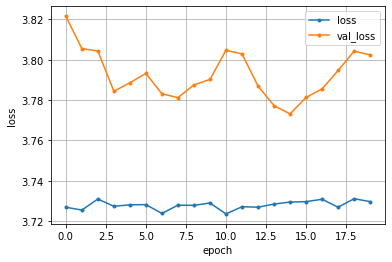

In [22]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

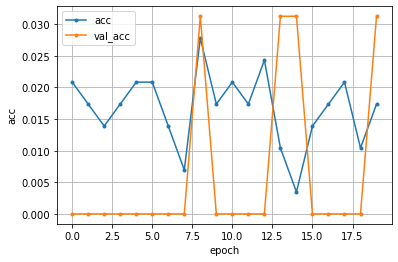

In [25]:
# accuracyのグラフ
plt.plot(range(20), acc, marker='.', label='acc')
plt.plot(range(20), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## モデルを変えてみる(最適化をAdamに変えてみる)

In [18]:
model = Sequential([
        Dense(80, input_shape=(4096,)),
        Activation('relu'),
        Dense(160),
        Activation('relu'),
        Dense(40),
        Activation('softmax')
    ])

In [19]:
# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 0s 1ms/step - loss: 3.6944 - accuracy: 0.0243 - val_loss: 3.6947 - val_accuracy: 0.0312
Epoch 2/20
288/288 [==============================] - 0s 570us/step - loss: 3.6876 - accuracy: 0.0278 - val_loss: 3.6986 - val_accuracy: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 0s 649us/step - loss: 3.6858 - accuracy: 0.0312 - val_loss: 3.7037 - val_accuracy: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 0s 742us/step - loss: 3.6834 - accuracy: 0.0347 - val_loss: 3.7203 - val_accuracy: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 0s 569us/step - loss: 3.6801 - accuracy: 0.0347 - val_loss: 3.7249 - val_accuracy: 0.0000e+00
Epoch 6/20
288/288 [==============================] - 0s 695us/step - loss: 3.6756 - accuracy: 0.0382 - val_loss: 3.7288 - val_accuracy: 0.0000e+00
Epoch 7/20
288/288 [==============================] - 0s 627us/step - los

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

### Loseグラフ

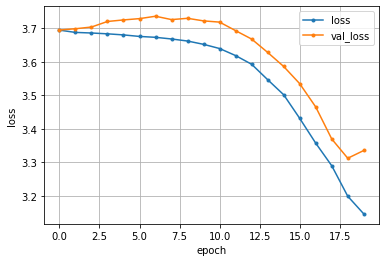

In [22]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### accのグラフ

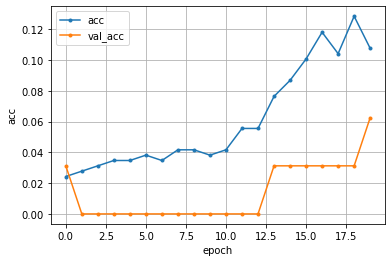

In [23]:
# accuracyのグラフ
plt.plot(range(20), acc, marker='.', label='acc')
plt.plot(range(20), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()